# Exploritory Data Analysis 
### WGU MSDA D207

### A: Reaseach question and issue at hand
#### A1.

#### A2.

#### A3.

### B: 

#### B1:


In [1]:
from scipy.stats import chi2_contingency, chi2
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
# import cleaned medical dataset
df = pd.read_csv('./medical_clean.csv')
#labeled relevent feilds for the chai squared anylasis
r = "ReAdmis"
c = "Complication_risk"
s = "Services"
m = "Marital"

In [3]:
contengency_complication_risk = pd.crosstab(df[c], df[r])
contengency_complication_risk

ReAdmis,No,Yes
Complication_risk,,
High,2135,1223
Low,1343,782
Medium,2853,1664


In [4]:
contengency_services = pd.crosstab(df[s], df[r])
contengency_services

ReAdmis,No,Yes
Services,,
Blood Work,3335,1930
CT Scan,737,488
Intravenous,2027,1103
MRI,232,148


In [5]:
contengency_marital = pd.crosstab(df[m], df[r])
contengency_marital

ReAdmis,No,Yes
Marital,,
Divorced,1283,678
Married,1268,755
Never Married,1243,741
Separated,1259,728
Widowed,1278,767


In [6]:
chi2_table_05 = {
    2: 5.991,
    3: 7.815,
    4: 9.488
}

def chi2_analize(contengency_tables):
    for contengency, label in contengency_tables:
        
        #calculate chi square values
        chi, p, dof, ex = chi2_contingency(contengency)
        # make assertion based on an alpha of .o5
        assertion = chi < chi2_table_05[dof]
        assertion_string = "Accept" if assertion else "Reject"
        #print formatted output
        print(f"Chi2 analysis for {label}")
        print(f"Test Statistic:      {chi}")
        print(f"P Value:             {p}")
        print(f"Degrees of Freedom:  {dof}")
        print(f"{assertion_string} null hypothosis based on an alpha of .05")
        print(f"\n \n")

#### B2:

In [7]:
test_contengencies = [
    (contengency_marital, "Marital Status"),
    (contengency_services, "Primary Service"),
    (contengency_complication_risk, "Complication Risk")  
]
     
chi2_analize(test_contengencies)

Chi2 analysis for Marital Status
Test Statistic:      5.085194357694356
P Value:             0.2786671961905379
Degrees of Freedom:  4
Accept null hypothosis based on an alpha of .05

 

Chi2 analysis for Primary Service
Test Statistic:      8.892645054628435
P Value:             0.03075281113212747
Degrees of Freedom:  3
Reject null hypothosis based on an alpha of .05

 

Chi2 analysis for Complication Risk
Test Statistic:      0.15902193516217972
P Value:             0.923567890607327
Degrees of Freedom:  2
Accept null hypothosis based on an alpha of .05

 



#### B3:  TODO

### C: Univariant Analyis

##### Continuous

1. Age
2. Initial Days

##### Catagorical

1. Services
2. Area

#### C1: Continuous

In [8]:
age = df["Age"]
initial_days = df["Initial_days"]

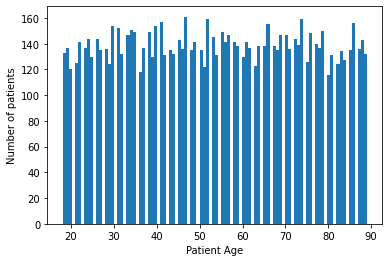

In [9]:
plt.hist(age, bins=100)
plt.xlabel("Patient Age")
plt.ylabel("Number of patients")
plt.show()

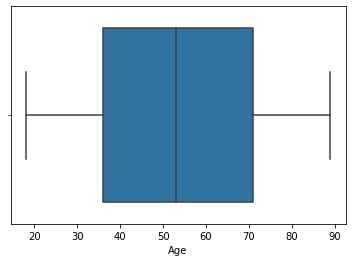

In [10]:
sns.boxplot(x= age)
plt.show()

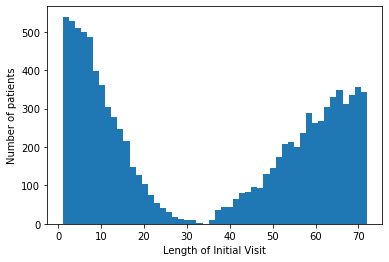

In [11]:
plt.hist(initial_days, bins=50)
plt.xlabel("Length of Initial Visit")
plt.ylabel("Number of patients")
plt.show()

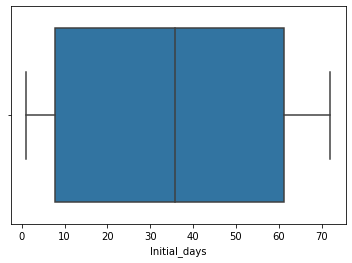

In [12]:
sns.boxplot(x= initial_days)
plt.show()

#### C2: Catagorical

In [13]:
services = df["Services"]
area = df["Area"]

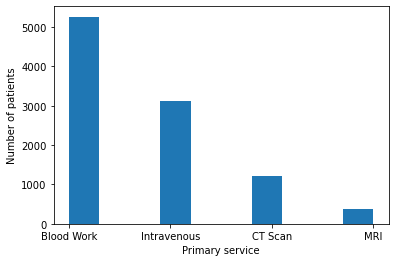

In [14]:
plt.hist(services)
plt.xlabel("Primary service")
plt.ylabel("Number of patients")
plt.show()

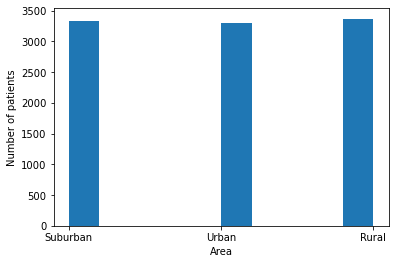

In [15]:
plt.hist(area)
plt.xlabel("Area")
plt.ylabel("Number of patients")
plt.show()

### D: Univariant Analyis

##### Continuous

1. Age
2. Initial Days

##### Catagorical

1. Services
2. Compplication Risk

#### D1: Continuous

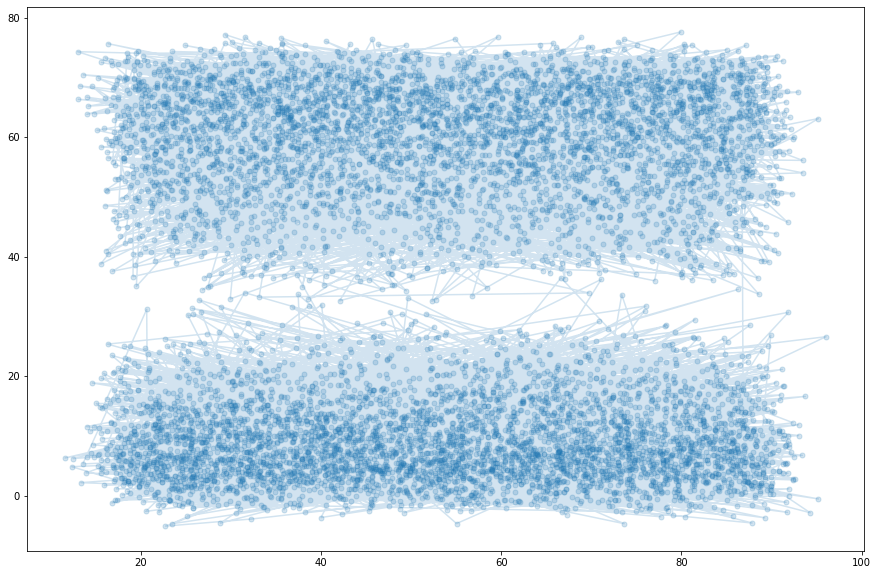

In [16]:
plt.figure(figsize=(15,10))
age = df["Age"] + np.random.normal(0,2.5, size=len(df))
initial_days = df["Initial_days"] + np.random.normal(0,2.5, size=len(df))
plt.plot(age, initial_days, marker='o', markersize=5, alpha=.2)
plt.show()

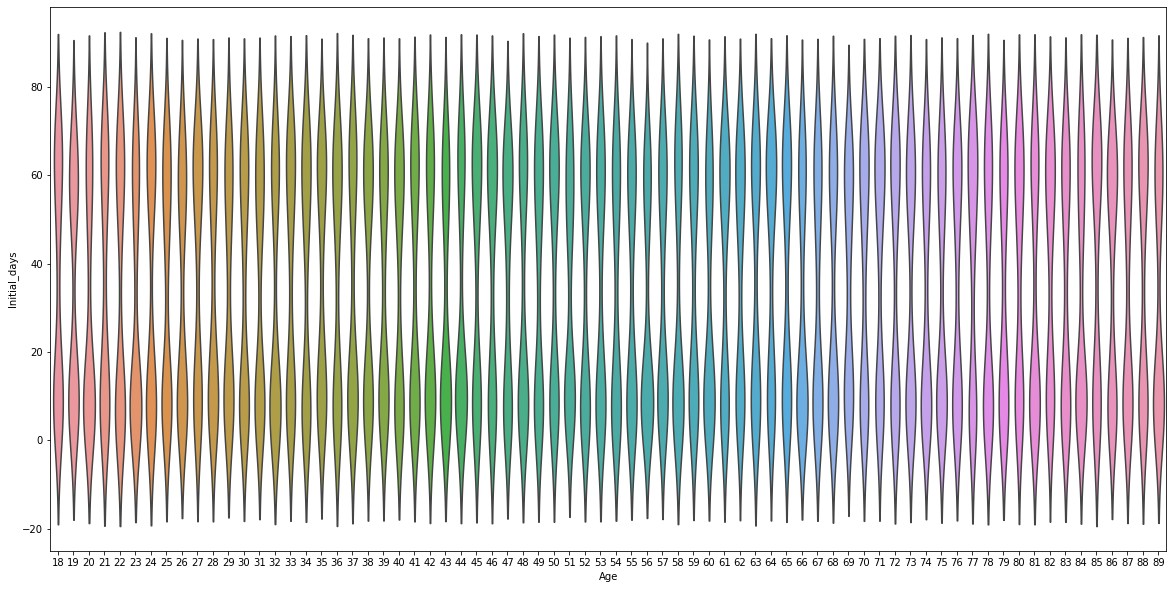

In [17]:
plt.figure(figsize=(20,10))
sns.violinplot(x="Age", y="Initial_days", data=df, inner=None)
plt.show()

#### D1: Categorical

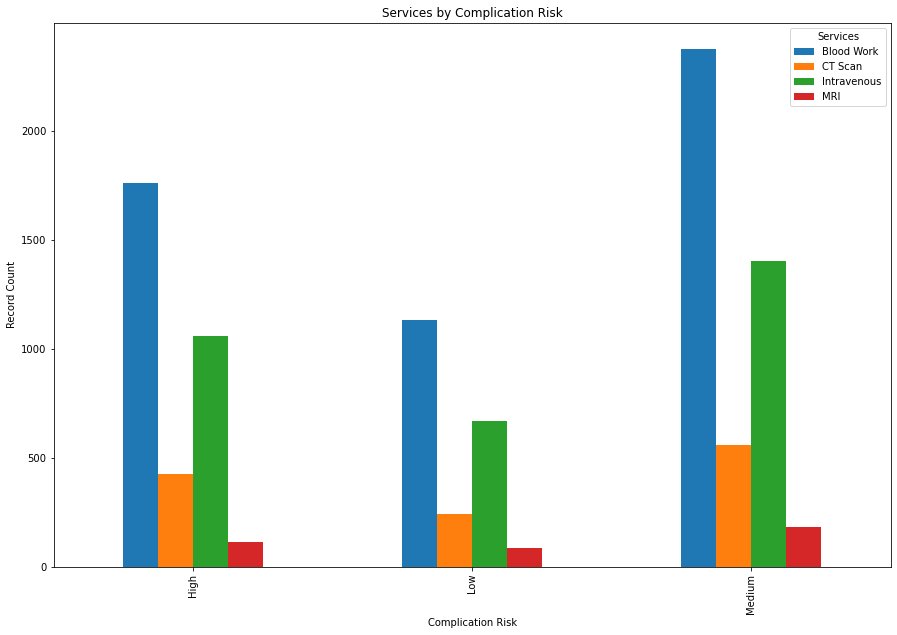

In [18]:
group_churn_state = df.groupby(['Complication_risk','Services']).size()
group_churn_state = group_churn_state.unstack()
group_churn_state.plot(kind='bar',figsize=(15,10))
plt.title('Services by Complication Risk')
plt.xlabel('Complication Risk')
plt.ylabel('Record Count')
plt.show()

### E:

#### E1.

#### E2.

#### E3.


### F: Panopto Presentation

### G: Sources